In [60]:
from sklearn.datasets import load_iris
iris= load_iris()
x= iris.data
y=iris.target

In [61]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [62]:
# Evaluation Approach 1: predcting on training dataset itself
knn5= KNeighborsClassifier(n_neighbors=5)
knn5.fit(x,y)
y_pred=knn5.predict(x)
print(metrics.accuracy_score(y,y_pred))

0.9666666666666667


In [63]:
knn1= KNeighborsClassifier(n_neighbors=1)
knn1.fit(x,y)
y_pred= knn1.predict(x)
print(metrics.accuracy_score(y,y_pred))
#accuracy=1; overfitting

1.0


In [64]:
from sklearn.linear_model import LogisticRegression
logreg= LogisticRegression()
logreg.fit(x,y)
y_pred=logreg.predict(x)
print(metrics.accuracy_score(y, y_pred))

0.96


In [65]:
# Evaluation approach 2: train/test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.4, random_state=4)
#random_state is used so that the tarin test split is same every time.

In [66]:
knn1.fit(x_train, y_train)
y_pred= knn1.predict(x_test)
print(metrics.accuracy_score(y_test, y_pred))


0.95


In [67]:
knn5.fit(x_train, y_train)
y_pred= knn5.predict(x_test)
print(metrics.accuracy_score(y_test, y_pred))

0.9666666666666667


In [68]:
logreg.fit(x_train, y_train)
y_pred= logreg.predict(x_test)
print(metrics.accuracy_score(y_test, y_pred))

0.95


In [69]:
#knn=5 seems to be better, but can we find an even better value for k?
scores=[]
k_range=range(1,26)
for k in k_range:
    knn= KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    y_pred= knn.predict(x_test)
    scores.append(metrics.accuracy_score(y_test,y_pred))

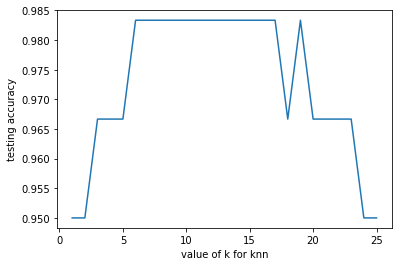

In [70]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(k_range, scores)
plt.xlabel("value of k for knn")
plt.ylabel("testing accuracy")

In [73]:
# now you know the optimal k which gives maximum accuracy, train the model on complete dataset and use for prediction
knn= KNeighborsClassifier(n_neighbors=11)
knn.fit(x_train,y_train)
y_pred= knn.predict([[3,5,4,2]])

In [74]:
print(y_pred)

[1]


In [79]:
#downside of train/test split is that depending on the splitting of training and testing data results dramatically chnage
# solution: use k-fold cross validation which perform train/test split many times and avergae out the testing accuracy.
from sklearn.cross_validation import cross_val_score
knn= KNeighborsClassifier(n_neighbors=5)
# fitting knn to x, y cross validation subset and finding accuracy of each subset.
scores= cross_val_score(knn,x,y,cv=10,scoring="accuracy")
print(scores.mean())
# knn.fit(x_train,y_train)
# y_pred= knn.predict([[3,5,4,2]])
#sklearn uses stratifies sampling by default while using cross_val_score function 

0.9666666666666668


In [82]:
# tune k using cross vaidation
k_scores=[]
k_range=range(1,31)
for k in k_range:
    knn= KNeighborsClassifier(n_neighbors=k)
    scores= cross_val_score(knn,x,y,cv=10,scoring="accuracy")
    k_scores.append(scores.mean())
    

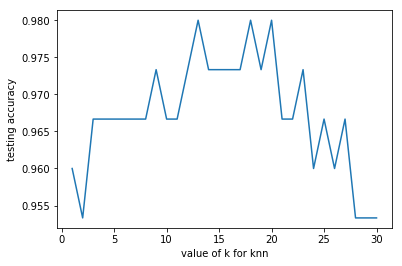

In [83]:
plt.plot(k_range, k_scores)
plt.xlabel("value of k for knn")
plt.ylabel("cross- validated accuracy")

In [84]:
#lets choose k=20 

In [85]:
#cross validation for model selection
knn= KNeighborsClassifier(n_neighbors=20)
scores= cross_val_score(knn,x,y,cv=10,scoring="accuracy")
print(scores.mean())

0.9800000000000001


In [86]:
logreg= LogisticRegression()
scores= cross_val_score(logreg,x,y,cv=10,scoring="accuracy")
print(scores.mean())

0.9533333333333334


In [87]:
# there knn gives better accuracy for this task

In [89]:
# cross validation for feature selection
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

In [92]:
data= pd.read_csv("http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv", index_col=0)

In [93]:
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [94]:
feature_col=["TV","radio","newspaper"]
x= data[feature_col]
y=data.sales

In [98]:
lm= LinearRegression()
scores=cross_val_score(lm, x,y,cv=10,scoring='neg_mean_squared_error')
print(scores)

[-3.56038438 -3.29767522 -2.08943356 -2.82474283 -1.3027754  -1.74163618
 -8.17338214 -2.11409746 -3.04273109 -2.45281793]


In [99]:
mse_scores=-scores
print(mse_scores)

[3.56038438 3.29767522 2.08943356 2.82474283 1.3027754  1.74163618
 8.17338214 2.11409746 3.04273109 2.45281793]


In [100]:
#convert MSE to Root mean squared error, error is something u want to minimize while accuracy mazimize
rmse_scores= np.sqrt(mse_scores)
print(rmse_scores.mean())

1.6913531708051797


In [101]:
# whether to include the feature newspaper or not
feature_col=["TV","radio"]
x= data[feature_col]
print(np.sqrt(-cross_val_score(lm, x,y,cv=10,scoring='neg_mean_squared_error')).mean())

1.6796748419090768


In [ ]:
# thus the model excluding newspaper is the better model